# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [4]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [5]:
df['Risk'] = df['Risk'].apply(lambda x: '0' if x == 1 else '1')

In [6]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,1


<AxesSubplot:xlabel='Risk', ylabel='count'>

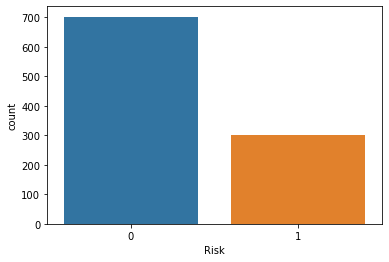

In [7]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [8]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [9]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [10]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,1
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,0
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,0
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,1


In [11]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below

Exploratory Data Analysis

In [12]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
Risk                        False
dtype: bool

In [13]:
df['Job'].head()

0      skilled employee
1      skilled employee
2    unskilled/resident
3      skilled employee
4      skilled employee
Name: Job, dtype: object

<AxesSubplot:>

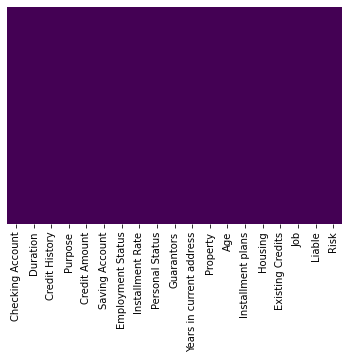

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
df['Job'].unique()

array(['skilled employee', 'unskilled/resident',
       'management/highly qualified employee', 'unemployed/non-resident',
       nan], dtype=object)

In [16]:
df['Credit History'].unique()

array(['default', 'paid back', 'delay', nan], dtype=object)

In [17]:
df.dropna(inplace=True)
#Nulls all gone

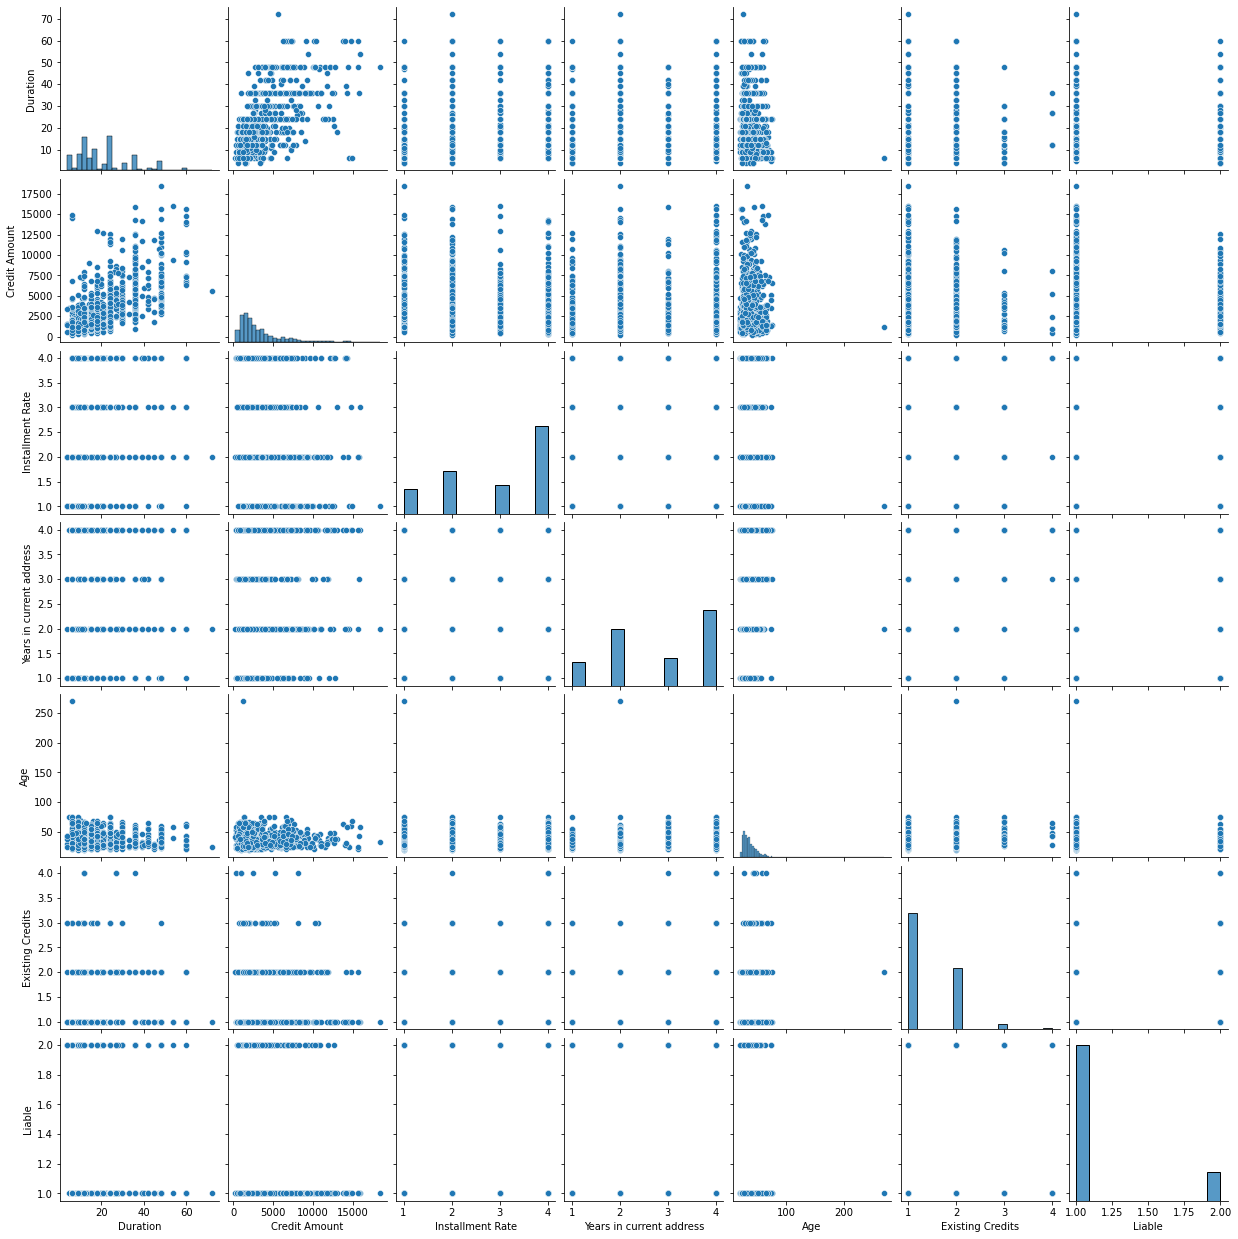

In [18]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Age', ylabel='Existing Credits'>

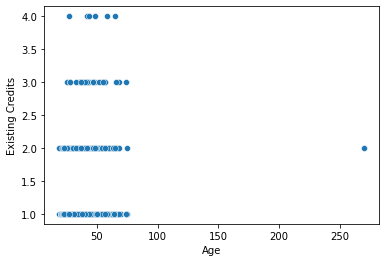

In [19]:
sns.scatterplot(x='Age', y = 'Existing Credits', data=df)

<AxesSubplot:xlabel='Age', ylabel='Existing Credits'>

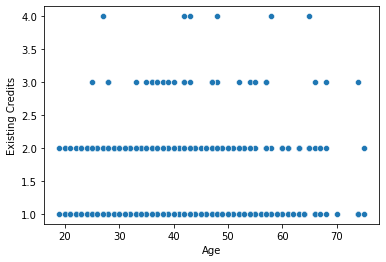

In [20]:
df = df[ df['Age'] <= 200]
sns.scatterplot(x='Age', y = 'Existing Credits', data=df)

In [21]:
df.isnull().sum()

Checking Account            0
Duration                    0
Credit History              0
Purpose                     0
Credit Amount               0
Saving Account              0
Employment Status           0
Installment Rate            0
Personal Status             0
Guarantors                  0
Years in current address    0
Property                    0
Age                         0
Installment plans           0
Housing                     0
Existing Credits            0
Job                         0
Liable                      0
Risk                        0
dtype: int64

In [22]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,0
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,1
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,0
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,0
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,1


In [23]:
numerical_features = ['Duration', 'Credit Amount', 'Installment Rate','Years in current address','Age','Existing Credits','Liable']
categorical_features = ['Checking Account', 'Credit History','Purpose', 'Savings Account', 'Employment Status', 'Personal Status','Guarantors','Property','Installment plans','Housing','Job']



In [24]:
numerical_df = df[numerical_features + ['Risk']]

In [25]:
numerical_df.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


In [26]:
CheckAcc = pd.get_dummies(df['Checking Account'],drop_first=True)
CredHist = pd.get_dummies(df['Credit History'],drop_first=True)
Purp = pd.get_dummies(df['Purpose'],drop_first=True)
SavingAcc = pd.get_dummies(df['Saving Account'],drop_first=True)
Employmentstat = pd.get_dummies(df['Employment Status'],drop_first=True)
PersonalStat = pd.get_dummies(df['Personal Status'],drop_first=True)
Guarantors = pd.get_dummies(df['Guarantors'],drop_first=True)
Prop = pd.get_dummies(df['Property'],drop_first=True)
Installment = pd.get_dummies(df['Installment plans'],drop_first=True)
Housing = pd.get_dummies(df['Housing'],drop_first=True)
Jobs = pd.get_dummies(df['Job'],drop_first=True)

In [27]:
CheckAcc.head()
CredHist.head()
Purp.head()
Prop.head()
Housing.head()
Jobs.head() 
Employmentstat.head()
PersonalStat.head()

In [28]:
#Changed these as the column name wasn't entirely clear and was a repeat
Guarantors.columns = ['guarantor','noguarantors']
Guarantors.head()

,guarantor,noguarantors
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [29]:
Installment.columns =['nostores','stores']
Installment.head()

,nostores,stores
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
#Data Frame with Credit History
df = pd.concat([numerical_df,CredHist,Purp,SavingAcc,Employmentstat,PersonalStat,Guarantors,Prop,Installment,Housing,Jobs], axis=1)
df

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,delay,paid back,...,life insurance,no property,real estate,nostores,stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,12,1736,3,4,31,1,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1
998,30,3857,4,4,40,1,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0
999,12,804,4,4,38,1,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1000,45,1845,4,4,23,1,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0


In [31]:
# Data Frame without Credit History
df2 = pd.concat([numerical_df,Purp,SavingAcc,Employmentstat,PersonalStat,Guarantors,Prop,Installment,Housing,Jobs], axis=1)
df2

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,car,domestic appliances,...,life insurance,no property,real estate,nostores,stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,12,1736,3,4,31,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1
998,30,3857,4,4,40,1,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
999,12,804,4,4,38,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1000,45,1845,4,4,23,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0


END of Exploratory Data Analysis

PART 1 | Model 1 WITH Credit History |
Support Vector Machines

In [32]:
#1st Model w/ Credit History
#1 classification model using SVC
X = df.drop('Risk',axis=1).values
Y = df[['Risk']].values

#Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train,Y_train)

#evaluation
Y_pred = svc_model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       142
           1       0.57      0.07      0.12        58

    accuracy                           0.71       200
   macro avg       0.65      0.52      0.48       200
weighted avg       0.68      0.71      0.62       200

Accuracy: 0.715
Confusion Matrix:
 [[139   3]
 [ 54   4]]


In [33]:
#2nd model w/ Credit History
#RBF, default c,gamma = 2**-5
svc_modela = SVC(kernel = 'rbf', gamma = 100000)
svc_modela.fit(X_train, Y_train)
Y_pred = svc_modela.predict(X_test)
print("Kernel = rbf, C = default, gamma = 100000")
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))


Kernel = rbf, C = default, gamma = 100000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

Accuracy: 0.71
Confusion Matrix:
 [[142   0]
 [ 58   0]]


In [34]:
#3rd model w/ Credit History
#RBF,default c, gamma = 2**5
svc_modelb = SVC(kernel='rbf',C=1,gamma = 10000000)
svc_modelb.fit(X_train, Y_train)
Y_pred = svc_modelb.predict(X_test)
print("Kernel = rbf, C = default, gamma = 10000000")
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

Kernel = rbf, C = default, gamma = 10000000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

Accuracy: 0.71
Confusion Matrix:
 [[142   0]
 [ 58   0]]


In [35]:
#4th model w/ Credit History
#RBF,default c, gamma = 0.1
svc_modelc = SVC(kernel='rbf', gamma = 0.1)
svc_modelc.fit(X_train, Y_train)
Y_pred = svc_modelc.predict(X_test)
print("Kernel = rbf, C = default, gamma = 0.1")
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

Kernel = rbf, C = default, gamma = 0.1
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

Accuracy: 0.71
Confusion Matrix:
 [[142   0]
 [ 58   0]]


PART 1 | Model 2 WITH Credit History | Decision Tree Classifier

In [36]:
#DecisionTree Model with Credit History
X = df.drop('Risk',axis=1).values

Y = df['Risk'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
#DecisionTreesClassifier Models(with different depths) with Credit History
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

modela = DecisionTreeClassifier(max_depth=3)
modela.fit(X_train, Y_train)
Y_pred = modela.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

modelb = DecisionTreeClassifier(max_depth=5)
modelb.fit(X_train, Y_train)
Y_pred = modelb.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

modelc = DecisionTreeClassifier(max_depth=20)
modelc.fit(X_train, Y_train)
Y_pred = modelc.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       142
           1       0.40      0.43      0.42        58

    accuracy                           0.65       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.66      0.65      0.65       200

Accuracy: 0.65
Confusion Matrix:
 [[105  37]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       142
           1       0.44      0.24      0.31        58

    accuracy                           0.69       200
   macro avg       0.59      0.56      0.56       200
weighted avg       0.65      0.69      0.66       200

Accuracy: 0.69
Confusion Matrix:
 [[124  18]
 [ 44  14]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       142
           1       0.50      0.29      0.37        58

    accuracy                           0.71       200
   macro avg  

PART 2 | Model 1 WITHOUT Credit History |
Support Vector Machines

In [38]:
#1st Model w/o Credit History
X = df2.drop('Risk',axis=1).values
Y = df2[['Risk']].values

#Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train,Y_train)

#evaluation
Y_pred = svc_model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       142
           1       0.57      0.07      0.12        58

    accuracy                           0.71       200
   macro avg       0.65      0.52      0.48       200
weighted avg       0.68      0.71      0.62       200

Accuracy: 0.715
Confusion Matrix:
 [[139   3]
 [ 54   4]]


In [39]:
#2nd model w/o Credit History
#RBF, default c,gamma = 100000
svc_modela = SVC(kernel = 'rbf', gamma = 100000)
svc_modela.fit(X_train, Y_train)
Y_pred = svc_modela.predict(X_test)
print("Kernel = rbf, C = default, gamma = 2**-5")
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))


Kernel = rbf, C = default, gamma = 2**-5
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

Accuracy: 0.71
Confusion Matrix:
 [[142   0]
 [ 58   0]]


In [40]:
#3rd model w/o Credit History
#RBF,default c, gamma = 10000000
svc_modelb = SVC(kernel='rbf',C=1,gamma = 10000000)
svc_modelb.fit(X_train, Y_train)
Y_pred = svc_modelb.predict(X_test)
print("Kernel = rbf, C = default, gamma = 10000000")
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

Kernel = rbf, C = default, gamma = 10000000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

Accuracy: 0.71
Confusion Matrix:
 [[142   0]
 [ 58   0]]


In [41]:
#4th model w/o Credit History
#RBF,default c, gamma = 0.1
svc_modelc = SVC(kernel='rbf', gamma = 0.1)
svc_modelc.fit(X_train, Y_train)
Y_pred = svc_modelc.predict(X_test)
print("Kernel = rbf, C = default, gamma = 0.1")
print(classification_report(Y_test,Y_pred))
print('Accuracy:', accuracy_score(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

Kernel = rbf, C = default, gamma = 0.1
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200

Accuracy: 0.71
Confusion Matrix:
 [[142   0]
 [ 58   0]]


SVM NOTES: Changing the gamma yielded little to no difference, the default was the most accurate. Had to use RBF because linear would not compile on laptop

PART 2 | Model 2 WITHOUT Credit History | Decision Tree Classifier

In [42]:
X = df2.drop('Risk',axis=1).values

Y = df2['Risk'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
#DecisionTreesClassifier Models(with different depths) without Credit History
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

modela = DecisionTreeClassifier(max_depth=3)
modela.fit(X_train, Y_train)
Y_pred = modela.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

modelb = DecisionTreeClassifier(max_depth=5)
modelb.fit(X_train, Y_train)
Y_pred = modelb.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

modelc = DecisionTreeClassifier(max_depth=20)
modelc.fit(X_train, Y_train)
Y_pred = modelc.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       142
           1       0.36      0.45      0.40        58

    accuracy                           0.60       200
   macro avg       0.55      0.56      0.55       200
weighted avg       0.63      0.60      0.62       200

Accuracy: 0.605
Confusion Matrix:
 [[95 47]
 [32 26]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       142
           1       0.39      0.24      0.30        58

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.63      0.67      0.64       200

Accuracy: 0.67
Confusion Matrix:
 [[120  22]
 [ 44  14]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       142
           1       0.44      0.19      0.27        58

    accuracy                           0.69       200
   macro avg     

10 Fold Cross-Validation for DecisionTreeClassifier

In [44]:
import random
for i in range(10):
    print(random.randint(1, 1000))

863
981
932
153
772
306
47
209
26
454


In [45]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test,Y_pred))
    print('Trial {}, ClassificationReport:{}\n Accuracy: {},  '.format(i,classification_report(Y_test,Y_pred),accuracy_score(Y_test,Y_pred)))
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf

Trial 0, ClassificationReport:              precision    recall  f1-score   support

           0       0.74      0.75      0.74       138
           1       0.42      0.40      0.41        62

    accuracy                           0.64       200
   macro avg       0.58      0.57      0.58       200
weighted avg       0.64      0.64      0.64       200

 Accuracy: 0.64,  
Trial 1, ClassificationReport:              precision    recall  f1-score   support

           0       0.73      0.74      0.73       142
           1       0.34      0.33      0.33        58

    accuracy                           0.62       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.62      0.62      0.62       200

 Accuracy: 0.62,  
Trial 2, ClassificationReport:              precision    recall  f1-score   support

           0       0.75      0.71      0.73       137
           1       0.44      0.49      0.46        63

    accuracy                           0.64       200


,trial,Accuracy
0,0,0.640
1,1,0.620
2,2,0.640
3,3,0.640
4,4,0.665
5,5,0.655
6,6,0.680
7,7,0.630
8,8,0.710
9,9,0.670


<AxesSubplot:xlabel='trial'>

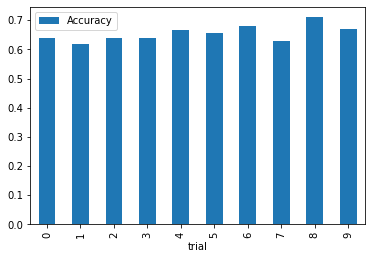

In [46]:
rdf.plot.bar(x='trial', y='Accuracy')

10 Fold Cross-Validation for SupportVectorMachine

In [48]:
svm = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = SVC(kernel = 'rbf')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm.append(accuracy_score(Y_test,Y_pred))
    print('Trial {}, ClassificationReport:{}\n Accuracy: {},  '.format(i,classification_report(Y_test,Y_pred),accuracy_score(Y_test,Y_pred)))
rdf = pd.DataFrame( {'trial': range(10), 'SVM': svm})
rdf

Trial 0, ClassificationReport:              precision    recall  f1-score   support

           0       0.70      0.98      0.82       137
           1       0.67      0.10      0.17        63

    accuracy                           0.70       200
   macro avg       0.68      0.54      0.49       200
weighted avg       0.69      0.70      0.61       200

 Accuracy: 0.7,  
Trial 1, ClassificationReport:              precision    recall  f1-score   support

           0       0.69      0.99      0.82       134
           1       0.88      0.11      0.19        66

    accuracy                           0.70       200
   macro avg       0.78      0.55      0.50       200
weighted avg       0.75      0.70      0.61       200

 Accuracy: 0.7,  
Trial 2, ClassificationReport:              precision    recall  f1-score   support

           0       0.75      0.97      0.85       146
           1       0.64      0.13      0.22        54

    accuracy                           0.74       200
  

,trial,SVM
0,0,0.700
1,1,0.700
2,2,0.745
3,3,0.645
4,4,0.685
5,5,0.695
6,6,0.705
7,7,0.690
8,8,0.725
9,9,0.695


<AxesSubplot:xlabel='trial'>

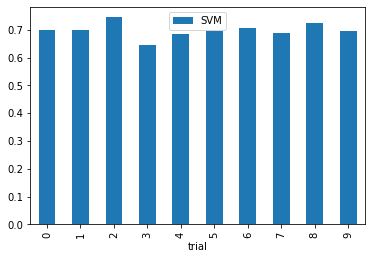

In [49]:
rdf.plot.bar(x='trial', y='SVM')